### Life Cycle of DataScience ---
- 1.Data-Collection Statergy- from company side,3rd party API's,Surveys
- 2.Feature Engineering-Handling missing values



## Why are missing values??
- 1.hesiate to putdown the information
- 2.survey informations are not valid
- 3.men--salary
- 4.woman--age
- 5.people may be died--NaN


In [6]:
import pandas as pd
import numpy as np

In [7]:
titanic_train = pd.read_csv("https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/ff414a1bcfcba32481e4d4e8db578e55872a2ca1/titanic.csv",
                           sep='\t')   
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


In [8]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Missing data Completely at Random(MCAR)
##### there is absolutely no relationship between missing values and other values,observed values,missing values,within dataset

In [9]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

In [10]:
titanic_train[titanic_train['Embarked'].isnull()]  #MCAR example

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN


#### Missing data Not at Random(MNAR)


##### there is absolutely no relationship between missing values and other values,observed values,missing values,within dataset

In [11]:
titanic_train['cabin_null']=np.where(titanic_train['Cabin'].isnull(),1,0) #1-->null values
titanic_train['cabin_null'].mean()*100 # there are 80% missing values of cabin

80.12820512820514

In [12]:
#How cabin_null has relation with survived people
titanic_train.groupby(['Survived'])['cabin_null'].mean()


Survived
0    0.862745
1    0.685185
Name: cabin_null, dtype: float64

In [13]:
#%of Survived is completely depends on % of missing values of cabin data

#### MAR(missing data at random)

1. men--salary
2. women---Age

#### All the techniques to handle the missing values
1. mean/mode/median imputation
2. random sample imputation
3. Capturing nan values with a new feature
4. End of Distribution Imputation
5. Arbitrary Imputation
6. Frequent Categories Imputation

In [15]:

data=pd.read_csv('https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/ff414a1bcfcba32481e4d4e8db578e55872a2ca1/titanic.csv', sep='\t',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
data.isnull().mean()

Survived    0.000000
Age         0.192308
Fare        0.000000
dtype: float64

# mean/median imputation

In [17]:

def impute(dataset,variable,median):
    data[variable+'_median']=data[variable].fillna(median)
        

In [18]:
median=data.Age.median()
median

26.0

In [19]:
impute(data,'Age',median)

In [20]:
data

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
151,1,22.0,66.6000,22.0
152,0,55.5,8.0500,55.5
153,0,40.5,14.5000,40.5
154,0,NaN,7.3125,26.0


In [23]:
print(data['Age'].std())
print(data['Age_median'].std())
# there is a minor change in std

14.613879926560795
13.150937531641045


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

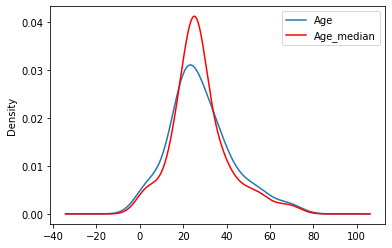

In [29]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['Age'].plot(kind='kde',ax=ax)
data['Age_median'].plot(kind='kde',color='red',ax=ax)
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

# pros and cons of mean/median imputation

### Pros:
1. easy to implement
2. Faster to complete the dataset


### cons:
1. change or Distortion in variance
2. impacts Correlation